# 实操Numpy

## 资料
* [视频](https://www.bilibili.com/video/BV13t4y1a7TV?spm_id_from=333.788.videopod.sections&vd_source=2a33d03ec3e67e46971208a7faa0dcda)
* [文档](https://github.com/jackfrued/Python-100-Days/blob/master/Day66-80/68.NumPy%E7%9A%84%E5%BA%94%E7%94%A8-1.md)

## 1.1 热身练习
用随机的方式生成5个学生3门课程的考试成绩，完成下列操作：

1. 统计每个学生的考试平均分
2. 统计每门课的最高分、最低分、标准差
3. 将学生及其考试成绩以行的方式输出（按平均分从高到低排序）

In [1]:
names = ['孙悟空', '李元芳', '白起', '狄仁杰', '达摩']
courses = ['语文', '数学', '英语']

In [2]:
import random
scores = [[random.randrange(60, 101) for _ in range(3)] for _ in range(5)]
scores

[[99, 96, 96], [90, 90, 93], [63, 94, 61], [93, 76, 91], [87, 68, 77]]

In [3]:
# 统计每个学生的考试平均分
for idx, name in enumerate(names):
    temp = scores[idx]
    avg_score = sum(temp) / len(temp)
    print(f'{name}考试平均分为：{avg_score:.1f}分')

孙悟空考试平均分为：97.0分
李元芳考试平均分为：91.0分
白起考试平均分为：72.7分
狄仁杰考试平均分为：86.7分
达摩考试平均分为：77.3分


总体方差：

$$ \sigma^2 = \frac {1} {N} \sum_{i=1}^{N} {(x_i - \mu)^2)} $$

总体标准差：

$$ \sigma = \sqrt {\frac {1} {N} \sum_{i=1}^{N} {(x_i - \mu)^2)}} $$

In [4]:
def mean(nums):
    """求均值"""
    return sum(nums) / len(nums)

def variance(nums):
    """求方差"""
    mean_value = mean(nums)
    return mean([(num - mean_value) ** 2 for num in nums])

def stddev(nums):
    """求标准差"""
    return variance(nums) ** 0.5

In [5]:
for idx, course in enumerate(courses):
    temp = [scores[i][idx] for i in range(len(names))]
    max_score, min_score = max(temp), min(temp)
    print(f'{course}成绩最高分：{max_score}分')
    print(f'{course}成绩最低分：{min_score}分')
    print(f'{course}成绩标准差：{stddev(temp)}')

语文成绩最高分：99分
语文成绩最低分：63分
语文成绩标准差：12.354756169184402
数学成绩最高分：96分
数学成绩最低分：68分
数学成绩标准差：10.925200226998129
英语成绩最高分：96分
英语成绩最低分：61分
英语成绩标准差：13.047605144240073


In [6]:
# 将学生及考试成绩以行的方式输出（按照平均分从高到低排序）
results = {name: temp for name, temp in zip(names, scores)}
results

{'孙悟空': [99, 96, 96],
 '李元芳': [90, 90, 93],
 '白起': [63, 94, 61],
 '狄仁杰': [93, 76, 91],
 '达摩': [87, 68, 77]}

In [7]:
sorted_keys = sorted(results, key = lambda x: mean(results[x]), reverse = True)
sorted_keys

['孙悟空', '李元芳', '狄仁杰', '达摩', '白起']

In [8]:
for key in sorted_keys:
    verbal, math, english = results[key]
    print(f'{key}\t{verbal}\t{math}\t{english}')

孙悟空	99	96	96
李元芳	90	90	93
狄仁杰	93	76	91
达摩	87	68	77
白起	63	94	61


## 1.2 Python数据分析三大神器

    1. numpy - Numerial Python - ndarray - 保存数据，完成批量的运算和处理
    2. pandas - Panel Data Set - Series/DataFrame - 封装了数据分析需要的各种方法
    3. matplotlib - 绘制统计图表

安装命令:

```
pip install -U numpy pandas matplotlib
```

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# list ---> 嵌套列表
scores

[[99, 96, 96], [90, 90, 93], [63, 94, 61], [93, 76, 91], [87, 68, 77]]

In [11]:
# 通过 array 函数将 list 处理成 ndarray 对象
scores = np.array(scores)
scores

array([[99, 96, 96],
       [90, 90, 93],
       [63, 94, 61],
       [93, 76, 91],
       [87, 68, 77]])

In [12]:
# ---------------------> 1 轴（沿着列的方向）
# | array([[97, 84, 68],
# |        [95, 82, 82],
# |        [77, 76, 68],
# |        [84, 78, 82],
# |        [99, 69, 81]])
# ↓
# 0 轴（沿着行的方向）

In [13]:
np.round(scores.mean(axis=1), 1)

array([97. , 91. , 72.7, 86.7, 77.3])

In [14]:
scores.max(axis=0)

array([99, 96, 96])

In [15]:
scores.min(axis=0)

array([63, 68, 61])

In [16]:
scores.std(axis=0)

array([12.35475617, 10.92520023, 13.04760514])

In [17]:
scores.var(axis=0)

array([152.64, 119.36, 170.24])

In [18]:
scores_df = pd.DataFrame(data=scores, columns=courses, index=names)
scores_df

,语文,数学,英语
孙悟空,99,96,96
李元芳,90,90,93
白起,63,94,61
狄仁杰,93,76,91
达摩,87,68,77


In [19]:
np.round(scores_df.mean(axis=1), 1)

孙悟空    97.0
李元芳    91.0
白起     72.7
狄仁杰    86.7
达摩     77.3
dtype: float64

In [20]:
scores_df.max()

语文    99
数学    96
英语    96
dtype: int32

In [21]:
scores_df.min()

语文    63
数学    68
英语    61
dtype: int32

In [22]:
scores_df['平均分'] = np.round(scores_df.mean(axis=1), 1)
scores_df

,语文,数学,英语,平均分
孙悟空,99,96,96,97.0
李元芳,90,90,93,91.0
白起,63,94,61,72.7
狄仁杰,93,76,91,86.7
达摩,87,68,77,77.3


In [23]:
# 将数据写入 excel 文件
scores_df.to_excel('考试成绩表.xlsx')

In [24]:
# 修改使得 plt 支持中文字体
# 查看 C:\Users\username\.matplotlib\fontlist-v330.json 文件找到支持中文的字体
plt.rcParams['font.sans-serif'] = ['FangSong', ]
plt.rcParams['axes.unicode_minus'] = False

In [25]:
# 矢量图，提高图片质量
%config InlineBackend.figure_format = 'svg'

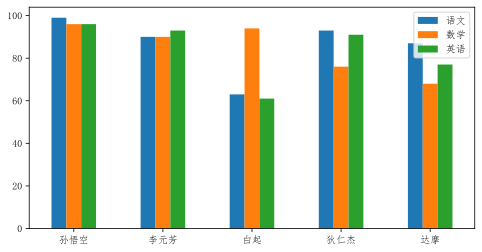

In [26]:
# 生成柱状图
scores_df.plot(figsize=(8, 4), kind='bar', y=['语文', '数学', '英语'])
# 横坐标文字横着显示
plt.xticks(rotation=0)
# 保存图的操作必须在显示图之前，显示图后图就被释放了 (svg矢量图更清晰)
plt.savefig('成绩柱状图.svg')
# 显示图
plt.show()

## 1.3 NumPy的应用
### 1.3.1 创建数组对象 - 一维数组

In [27]:
# 方法一：通过 array 函数将 list 处理成 ndarray 对象
array1 = np.array([1, 2, 10, 20, 100])
array1

array([  1,   2,  10,  20, 100])

In [28]:
type(array1)

numpy.ndarray

In [29]:
# 方法二：指定一个范围创建数组对象
array2 = np.arange(1, 20, 2)
array2

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [30]:
# 方法三：指定范围和元素的个数创建数组对象
array3 = np.linspace(-5, 5, 10)
array3

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [31]:
# 方法四：用随机生成元素的方式创建数组对象
array4 = np.random.random(10)
array4

array([0.73711155, 0.78882694, 0.56130063, 0.94364568, 0.65777035,
       0.19102854, 0.47503744, 0.34101279, 0.1630476 , 0.46981312])

In [32]:
array5 = np.random.randint(1, 11, 10) # [1, 11) 范围内产生 10 个随机整数
array5

array([7, 8, 9, 8, 7, 5, 4, 6, 4, 8])

In [33]:
# 生成20个随机数，满足正态分布，均值为0，标准差为1
array6 = np.random.normal(0, 1, 20)
array6

array([ 0.37869439, -1.06110403,  0.56734816, -0.20760227, -0.79489914,
       -0.99655416, -0.65429533,  0.05704808,  0.02838821, -0.63978021,
       -0.19239243, -0.07290331,  1.00191672, -0.82146079, -0.6455396 ,
        0.34893548,  1.1030459 , -0.22275866, -3.22014377,  2.80015162])

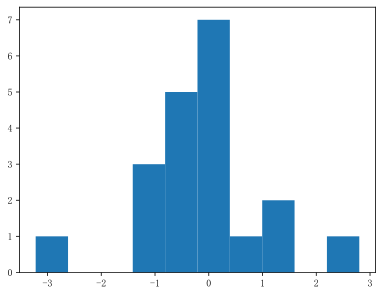

In [34]:
plt.hist(array6, bins=10) # bins表示数据分成10组
plt.show()

In [35]:
# 迭代器 - 实现了迭代器协议的对象
# 迭代器协议是两个魔术方法：__iter__、__next__
# 生成器 - 语法简化升级版的迭代器

def fib(num):
    a, b = 0, 1
    for _ in range(num):
        a, b = b, a + b
        yield a

gen = fib(20)
gen

<generator object fib at 0x000001A8A6F4CB30>

In [36]:
# 方法五：通过迭代器、生成器获取数据创建数组对象
array7 = np.fromiter(gen, dtype=np.int32)
array7

array([   1,    1,    2,    3,    5,    8,   13,   21,   34,   55,   89,
        144,  233,  377,  610,  987, 1597, 2584, 4181, 6765])

In [37]:
# 方法六：通过正则表达式解析文本内容创建数组对象
with open('data/news.txt', 'r', encoding='utf-8') as file:
    temp = np.fromregex(file, r'\d+(?=百万美元)', dtype=[('aaa', np.int32)])
temp['aaa']
# r'\d+(?=百万美元)': 匹配一个或多个数字，并且这些数字后面紧跟着 百万美元
# r 前缀表示一个原始字符串（raw string）。原始字符串的目的是让字符串中的反斜杠 \ 
# 不被解释为转义字符，而是直接作为字面意义上的反斜杠。

array([2356266,  577290])

In [38]:
# 元素个数
array1.size

5

In [39]:
# 形状
array1.shape

(5,)

In [40]:
# 维度
array1.ndim

1

In [41]:
# 数据类型
array1.dtype

dtype('int32')

In [42]:
# 元素占用内存空间的大小（字节）
array1.itemsize

4

In [43]:
# 所有元素占用内存空间的大小（字节）
array1.nbytes

20

### 1.3.2 创建数组对象 - 二维数组

In [44]:
# 方法一：通过array函数将嵌套列表处理成二维数组
array8 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array8

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
# 方法二：通过对一维数组调形变成二维数组
temp = np.arange(1, 10)
array9 = temp.reshape((3, 3))
array9

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
# 方法三：通过生成随机元素创建二维数组
array10 = np.random.randint(60, 101, (5, 3))
array10

array([[63, 86, 84],
       [88, 67, 84],
       [72, 82, 65],
       [62, 93, 67],
       [71, 86, 89]])

In [47]:
# 方法四：创建全0、全1、指定值的二维数组
array11 = np.zeros((5, 4), dtype='i8') # i8 为 int64
array11

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [48]:
array12 = np.ones((5, 4), dtype='i8')
array12

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int64)

In [49]:
array13 = np.full((5, 4), 100, dtype='i8')
array13

array([[100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100]], dtype=int64)

In [50]:
# 方法五：创建单位矩阵
array14 = np.eye(5, dtype='i8')
array14

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

In [51]:
# 读取图片创建三维数组
array15 = plt.imread('data/guido.jpg')
array15

array([[[ 24,  23,  19],
        [ 30,  29,  25],
        [ 31,  30,  26],
        ...,
        [ 25,  24,  20],
        [ 25,  24,  20],
        [ 25,  24,  20]],

       [[ 29,  28,  24],
        [ 36,  35,  31],
        [ 37,  36,  32],
        ...,
        [ 31,  30,  26],
        [ 31,  30,  26],
        [ 31,  30,  26]],

       [[ 31,  30,  26],
        [ 37,  36,  32],
        [ 39,  38,  34],
        ...,
        [ 32,  31,  27],
        [ 32,  31,  27],
        [ 32,  31,  27]],

       ...,

       [[192, 142,  91],
        [231, 180, 127],
        [229, 176, 124],
        ...,
        [ 73,  66,  56],
        [ 71,  64,  54],
        [ 69,  62,  52]],

       [[191, 141,  88],
        [230, 179, 126],
        [228, 175, 123],
        ...,
        [ 75,  68,  58],
        [ 73,  66,  56],
        [ 69,  65,  54]],

       [[190, 140,  87],
        [229, 178, 125],
        [226, 173, 121],
        ...,
        [ 77,  70,  60],
        [ 74,  67,  57],
        [ 71,  67,  56]]

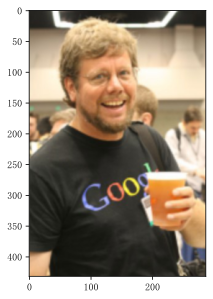

In [52]:
plt.imshow(array15)

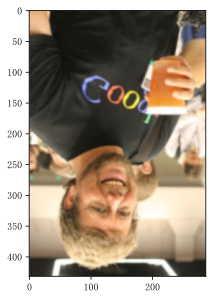

In [53]:
plt.imshow(array15[::-1])

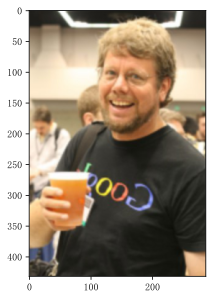

In [54]:
plt.imshow(array15[:,::-1])

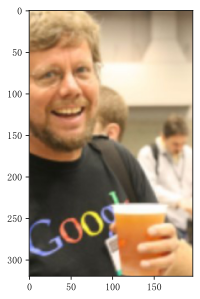

In [55]:
plt.imshow(array15[30:350, 90:300])

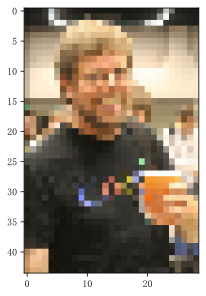

In [56]:
plt.imshow(array15[::10, ::10])

### 1.3.3 数组对象的索引和切片

In [57]:
array10

array([[63, 86, 84],
       [88, 67, 84],
       [72, 82, 65],
       [62, 93, 67],
       [71, 86, 89]])

In [58]:
# 获取某个指定的元素
array10[1, 2]

84

In [59]:
# 获取一部分的元素
array10[3:, 1:]

array([[93, 67],
       [86, 89]])

In [60]:
# 索引
array10[2]

array([72, 82, 65])

In [61]:
# 切片（逗号前后均有冒号，共两个冒号）
array10[2:3, :]

array([[72, 82, 65]])

In [62]:
array2

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [63]:
# 花式索引（fancy index) （注意两个[]）
array2[[0, 1, 2, -3, -2, -1]]

array([ 1,  3,  5, 15, 17, 19])

In [64]:
array10

array([[63, 86, 84],
       [88, 67, 84],
       [72, 82, 65],
       [62, 93, 67],
       [71, 86, 89]])

In [65]:
array10[[0, 1, 4], [0, 1, 2]]

array([63, 67, 89])

In [66]:
# 布尔索引
array2[array2 > 5]

array([ 7,  9, 11, 13, 15, 17, 19])

In [67]:
array16 = np.arange(1, 10)
array16

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
array16[(array16 > 5) & (array16 % 2 != 0)]
# 注意不能使用 and，因为 and要求两边都是布尔值，而这里两边都是一串布尔值

array([7, 9])

In [69]:
array16[(array16 > 5) | (array16 % 2 != 0)]

array([1, 3, 5, 6, 7, 8, 9])

In [70]:
array16[(array16 > 5) | ~(array16 % 2 != 0)]

array([2, 4, 6, 7, 8, 9])

### 1.3.4 ndarray对象的方法

```
sum()/mean()/max()/min()/var()/std()/median()/cumsum()
```

In [71]:
array1 = np.random.randint(10, 50, 10)
array1

array([46, 45, 30, 32, 40, 25, 43, 25, 38, 20])

In [72]:
array1.sum() # np.sum(array1)

344

In [73]:
array1.mean() # np.mean(array1)

34.4

In [74]:
array1.max() # np.amax(array1)

46

In [75]:
array1.min() # np.amin(array1)

20

In [76]:
np.median(array1) # 注意没有array1.median()

35.0

In [77]:
array1.var() # np.var(array1)

77.44000000000001

In [78]:
array1.std() # np.std(array1)

8.8

In [79]:
array1.cumsum() # np.cumsum(array1)

array([ 46,  91, 121, 153, 193, 218, 261, 286, 324, 344])

In [80]:
channel_a = np.array([42, 45, 62, 56, 35, 79, 67, 74, 30, 28, 54])
channel_b = np.array([65, 36, 123, 25, 45, 32, 26, 78, 57, 51, 34])
channel_c = np.array([82, 36, 21, 23, 25, 43, 52, 59, 60, 76, 95])

In [81]:
channel_a.mean(), channel_a.var()

(52.0, 277.8181818181818)

In [82]:
channel_b.mean(), channel_b.var()

(52.0, 758.7272727272727)

In [83]:
channel_c.mean(), channel_c.var()

(52.0, 573.2727272727273)

In [84]:
# 只有pandas有描述性统计信息，numpy没有
pd.Series(channel_a).describe()

count    11.000000
mean     52.000000
std      17.481419
min      28.000000
25%      38.500000
50%      54.000000
75%      64.500000
max      79.000000
dtype: float64

In [85]:
q1 = np.quantile(channel_a, 0.25)
q1

38.5

In [86]:
q3 = np.quantile(channel_a, 0.75)
q3

64.5

In [87]:
# 四分位距离, 越小说明数据越集中
iqr = q3 - q1
iqr

26.0

In [88]:
array2 = np.array([5, 6, 6, 6, 6, 8, 10, 500])
array2

array([  5,   6,   6,   6,   6,   8,  10, 500])

用数值判定法检测疑似异常值（离群点）：

$$ data < Q_1 - 1.5 \times IQR $$ 或 $$ data > Q_3 + 1.5 \times IQR $$

In [89]:
q1, q3 = np.quantile(array2, [0.25, 0.75])
q1, q3

(6.0, 8.5)

In [90]:
iqr = q3 - q1
iqr

2.5

In [91]:
array2[(array2 < q1 - 1.5 * iqr) | (array2 > q3 + 1.5 * iqr)]

array([500])

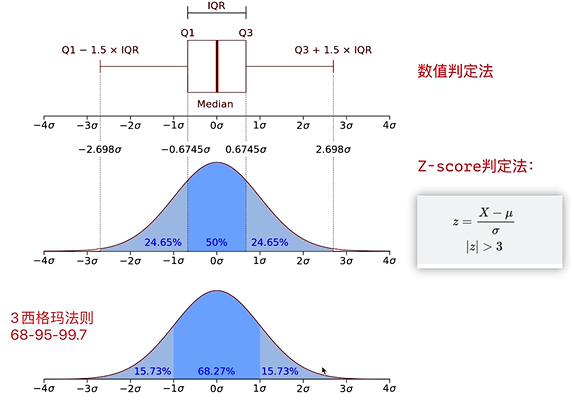

In [92]:
def outerlies_by_zscore(array, threshold=3):
    """Z-score判定法检测离群点"""
    mu, sigma = array.mean(), array.std()
    return array[np.abs((array - mu) / sigma) > threshold]

In [93]:
array3 = np.arange(1, 11)
array3[-1] = 500
array3

array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 500])

In [94]:
outerlies_by_zscore(array3)

array([], dtype=int32)

In [95]:
np.tile(array3, 10) # tile 是 1 ~ 500 次序重复，而repeat是每个元素分别重复

array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 500,   1,   2,   3,
         4,   5,   6,   7,   8,   9, 500,   1,   2,   3,   4,   5,   6,
         7,   8,   9, 500,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       500,   1,   2,   3,   4,   5,   6,   7,   8,   9, 500,   1,   2,
         3,   4,   5,   6,   7,   8,   9, 500,   1,   2,   3,   4,   5,
         6,   7,   8,   9, 500,   1,   2,   3,   4,   5,   6,   7,   8,
         9, 500,   1,   2,   3,   4,   5,   6,   7,   8,   9, 500,   1,
         2,   3,   4,   5,   6,   7,   8,   9, 500])

In [96]:
array4 = np.repeat(array3[:-1], 10) # 除了最后一个元素，其他都重复10次
array4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [97]:
array4 = np.append(array4, array3[-1])
array4

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9, 500])

In [98]:
outerlies_by_zscore(array4)

array([500])

In [99]:
array4.dtype

dtype('int32')

In [100]:
array4.astype(np.float64) # 注意是只改变新返回的数组的数据类型，原数组并没有变

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   3.,   3.,
         3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   6.,   6.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   7.,   7.,   7.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9., 500.])

In [101]:
array4.dtype

dtype('int32')

序列化：把对象处理成字符串（str）或字节串（bytes）

反序列化：把字符串或字节串还原成对象

- json模块：对象 -> 字符串（通用，跨语言）
    - dump/dumps: 序列化，dump转换成字符串，并将其写入文件；dumps转换成字符串，并返回这个字符串
    - load/loads: 反序列化
- pickle模块：对象 -> 字节串（仅python支持）
    - dump/dumps
    - load/loads

In [102]:
type('hello')

str

In [103]:
type(b'hello')

bytes

In [104]:
import json

a = [1, 2, 3]
json.dumps(a)

'[1, 2, 3]'

In [105]:
b = {'name': 'andrew', 'age': 42}
json.dumps(b)

'{"name": "andrew", "age": 42}'

In [106]:
import pickle

a = [1, 2, 3]
pickle.dumps(a)

b'\x80\x04\x95\x0b\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03e.'

In [107]:
b = {'name': 'andrew', 'age': 42}
pickle.dumps(b)

b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x04name\x94\x8c\x06andrew\x94\x8c\x03age\x94K*u.'

In [108]:
with open('data/array3', 'wb') as file:
    array3.dump(file)

In [109]:
with open('data/array3', 'rb') as file:
    array6 = np.load(file, allow_pickle=True)
array6

array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 500])

In [110]:
id(array3)

1823878305808

In [111]:
id(array6)

1823878701776

In [112]:
array3 is array6

False

In [113]:
array6.fill(100)
array6

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

In [114]:
array7 = np.arange(1, 11).reshape(5, 2)
array7

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [115]:
array7.flatten()    # 行优先

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [116]:
array7.flatten('F') # 列优先

array([ 1,  3,  5,  7,  9,  2,  4,  6,  8, 10])

In [117]:
array7.nonzero()    # 返回所有非零值的坐标

(array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int64),
 array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64))

In [118]:
array8 = np.random.randint(1, 100, 10)
array8

array([84, 78, 60,  9, 96, 29, 79, 78, 42, 97])

In [119]:
np.sort(array8) # 原数组不变，返回新的排序好的数组

array([ 9, 29, 42, 60, 78, 78, 79, 84, 96, 97])

In [120]:
array8

array([84, 78, 60,  9, 96, 29, 79, 78, 42, 97])

In [121]:
array8.sort() # 对array进行就地排序

In [122]:
array8

array([ 9, 29, 42, 60, 78, 78, 79, 84, 96, 97])

In [123]:
array7

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [124]:
array7.transpose() # 交换轴，等价于swapaxes

array([[ 1,  3,  5,  7,  9],
       [ 2,  4,  6,  8, 10]])

In [125]:
array7.swapaxes(0, 1)

array([[ 1,  3,  5,  7,  9],
       [ 2,  4,  6,  8, 10]])

In [126]:
array7.tolist() # ndarray转换成list

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]

In [127]:
array9 = np.array([1, 2, 1, 1, 1, 3, 3, 2, 1])
array9

array([1, 2, 1, 1, 1, 3, 3, 2, 1])

In [128]:
np.unique(array9)

array([1, 2, 3])

In [129]:
array10 = np.array([[1, 1, 1], [2, 2, 2]]) # 注意是大列表里放若干个小列表
array10

array([[1, 1, 1],
       [2, 2, 2]])

In [130]:
array11 = np.array([[3, 3, 3], [4, 4, 4]])
array11

array([[3, 3, 3],
       [4, 4, 4]])

In [131]:
np.hstack((array10, array11))

array([[1, 1, 1, 3, 3, 3],
       [2, 2, 2, 4, 4, 4]])

In [132]:
np.vstack((array10, array11))

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [133]:
np.stack((array10, array11), axis=0) # 二维变三维

array([[[1, 1, 1],
        [2, 2, 2]],

       [[3, 3, 3],
        [4, 4, 4]]])

In [134]:
np.stack((array10, array11), axis=1) # 二维变三维

array([[[1, 1, 1],
        [3, 3, 3]],

       [[2, 2, 2],
        [4, 4, 4]]])

In [135]:
array12 = np.concatenate((array10, array11), axis=0) # 等价于vstack
array12 

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [136]:
array13 = np.concatenate((array10, array11), axis=1) # 等价于hstack
array13

array([[1, 1, 1, 3, 3, 3],
       [2, 2, 2, 4, 4, 4]])

In [137]:
array12

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [138]:
np.vsplit(array12, 2)

[array([[1, 1, 1],
        [2, 2, 2]]),
 array([[3, 3, 3],
        [4, 4, 4]])]

In [139]:
np.hsplit(array12, 3)

[array([[1],
        [2],
        [3],
        [4]]),
 array([[1],
        [2],
        [3],
        [4]]),
 array([[1],
        [2],
        [3],
        [4]])]

In [140]:
array13

array([[1, 1, 1, 3, 3, 3],
       [2, 2, 2, 4, 4, 4]])

In [141]:
np.split(array13, 2)

[array([[1, 1, 1, 3, 3, 3]]), array([[2, 2, 2, 4, 4, 4]])]

In [142]:
np.split(array13, 3, axis=1)

[array([[1, 1],
        [2, 2]]),
 array([[1, 3],
        [2, 4]]),
 array([[3, 3],
        [4, 4]])]

In [143]:
array14 = np.random.randint(10, 100, 5)
array14

array([96, 54, 68, 60, 76])

In [144]:
array14[array14 <= 70]

array([54, 68, 60])

In [145]:
np.extract(array14 <= 70, array14)

array([54, 68, 60])

In [146]:
# 对于偶数原封不动，对于奇数进行平方
np.select([array14 % 2 == 0, array14 % 2 != 0], [array14, array14 ** 2])

array([96, 54, 68, 60, 76])

In [147]:
# 对于偶数原封不动，否则赋值0
np.where(array14 % 2 == 0, array14, 0)

array([96, 54, 68, 60, 76])

In [148]:
array15 = np.arange(1, 10).reshape(3, 3)
array15

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [149]:
np.resize(array15, (5, 3)) # reshape必须元素个数一致，resize则不需要

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6]])

In [150]:
np.put(array15, 5, 100) # 替换数组中指定索引的元素
array15

array([[  1,   2,   3],
       [  4,   5, 100],
       [  7,   8,   9]])

In [151]:
np.put(array15, [1, 2], 100)
array15

array([[  1, 100, 100],
       [  4,   5, 100],
       [  7,   8,   9]])

In [152]:
np.put(array15, array15 == 100, 99) # 替换数组中满足条件的元素
array15

array([[ 99,  99, 100],
       [  4,   5, 100],
       [  7,   8,   9]])

### 1.3.5 广播机制

广播机制的前提条件（必须满足其中一个）：

1. 两个数组的后缘维度（shape属性从后往前看）相同。
2. 两个数组的后缘维度不同，但是其中一方为1。

满足广播机制是为了沿着缺失的轴或者沿着维度为1的轴广播自己，最终让形状变得一致。

In [153]:
array16 = np.arange(1, 10).reshape((3, 3))
array16

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [154]:
array17 = np.array([1, 1, 1])
print(array16.shape, array17.shape)

(3, 3) (3,)


In [155]:
array16 + array17

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [156]:
array18 = np.array([[1, 1, 1]])
print(array16.shape, array18.shape)

(3, 3) (1, 3)


In [157]:
array16 + array18

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [158]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
x

array([-6.28318531, -6.17758555, -6.0719858 , -5.96638605, -5.86078629,
       -5.75518654, -5.64958679, -5.54398704, -5.43838728, -5.33278753,
       -5.22718778, -5.12158802, -5.01598827, -4.91038852, -4.80478876,
       -4.69918901, -4.59358926, -4.48798951, -4.38238975, -4.27679   ,
       -4.17119025, -4.06559049, -3.95999074, -3.85439099, -3.74879123,
       -3.64319148, -3.53759173, -3.43199197, -3.32639222, -3.22079247,
       -3.11519272, -3.00959296, -2.90399321, -2.79839346, -2.6927937 ,
       -2.58719395, -2.4815942 , -2.37599444, -2.27039469, -2.16479494,
       -2.05919518, -1.95359543, -1.84799568, -1.74239593, -1.63679617,
       -1.53119642, -1.42559667, -1.31999691, -1.21439716, -1.10879741,
       -1.00319765, -0.8975979 , -0.79199815, -0.68639839, -0.58079864,
       -0.47519889, -0.36959914, -0.26399938, -0.15839963, -0.05279988,
        0.05279988,  0.15839963,  0.26399938,  0.36959914,  0.47519889,
        0.58079864,  0.68639839,  0.79199815,  0.8975979 ,  1.00

In [159]:
y = np.sin(x)
y

array([ 2.44929360e-16,  1.05403600e-01,  2.09632904e-01,  3.11526698e-01,
        4.09949789e-01,  5.03805651e-01,  5.92048639e-01,  6.73695644e-01,
        7.47837039e-01,  8.13646821e-01,  8.70391805e-01,  9.17439797e-01,
        9.54266640e-01,  9.80462047e-01,  9.95734176e-01,  9.99912882e-01,
        9.92951609e-01,  9.74927912e-01,  9.46042594e-01,  9.06617463e-01,
        8.57091753e-01,  7.98017227e-01,  7.30052033e-01,  6.53953365e-01,
        5.70569037e-01,  4.80828028e-01,  3.85730138e-01,  2.86334849e-01,
        1.83749518e-01,  7.91170425e-02, -2.63968718e-02, -1.31616700e-01,
       -2.35370193e-01, -3.36501439e-01, -4.33883739e-01, -5.26432163e-01,
       -6.13115633e-01, -6.92968413e-01, -7.65100867e-01, -8.28709371e-01,
       -8.83085266e-01, -9.27622754e-01, -9.61825643e-01, -9.85312882e-01,
       -9.97822801e-01, -9.99216026e-01, -9.89477037e-01, -9.68714334e-01,
       -9.37159234e-01, -8.95163291e-01, -8.43194380e-01, -7.81831482e-01,
       -7.11758240e-01, -

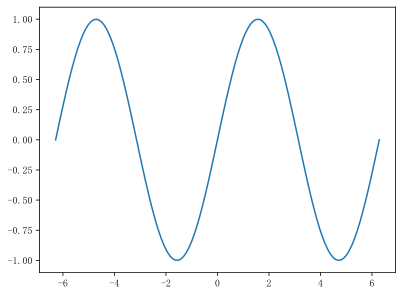

In [160]:
plt.plot(x, y)
plt.show()

$$ A \cdot B = \sum a_ib_i $$

$$ A \cdot B = |A||B|cos\theta $$

In [161]:
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])
np.dot(a, b)

26

In [162]:
# linear algebra
np.linalg.norm(a) # a的模

3.7416573867739413

In [163]:
np.linalg.norm(b)

7.0710678118654755

In [164]:
np.dot(a, b) / np.linalg.norm(a) / np.linalg.norm(b)

0.9827076298239907

In [165]:
np.rad2deg(np.arccos(np.dot(a, b) / np.linalg.norm(a) / np.linalg.norm(b)))

10.670695265781017

In [166]:
# numpy 官方不建议使用matrix，应当使用ndarray
m1 = np.matrix('1 2; 3 4')
m1

matrix([[1, 2],
        [3, 4]])

In [167]:
m1.A

array([[1, 2],
       [3, 4]])

In [168]:
m1.A1

array([1, 2, 3, 4])

In [169]:
m1.T # 转置

matrix([[1, 3],
        [2, 4]])

In [170]:
m1.swapaxes(0, 1)

matrix([[1, 3],
        [2, 4]])

In [171]:
m1.transpose()

matrix([[1, 3],
        [2, 4]])

In [172]:
m1.I # 逆矩阵

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [173]:
m2 = np.matrix('1 0 2; -1 3 1')
m2

matrix([[ 1,  0,  2],
        [-1,  3,  1]])

In [174]:
m3 = np.mat([[3, 1], [2, 1], [1, 0]])
m3

matrix([[3, 1],
        [2, 1],
        [1, 0]])

In [175]:
m2 * m3 # 矩阵乘法（不是二维数组的对应元素相乘）

matrix([[5, 1],
        [4, 2]])

In [176]:
m4 = np.asmatrix(np.arange(1, 10).reshape((3, 3)))
m4

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [177]:
np.linalg.det(m4) # determinant, 计算矩阵行列式的值，为0表示不可逆矩阵

-9.51619735392994e-16

In [178]:
np.linalg.matrix_rank(m4) # 计算矩阵的秩（线性无关的向量的数量）

2

In [179]:
array2 = m2.A
array2

array([[ 1,  0,  2],
       [-1,  3,  1]])

In [180]:
array3 = m3.A
array3

array([[3, 1],
       [2, 1],
       [1, 0]])

In [181]:
# 数组对象的矩阵乘法是 @
array2 @ array3

array([[5, 1],
       [4, 2]])

In [182]:
# 数组对象的矩阵求逆矩阵
array1 = m1.A
np.linalg.inv(array1)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [183]:
# 解线性方程组
A = np.array([[1, 2, 1], [3, 7, 2], [2, 2, 1]])
b = np.array([8, 23, 9]).reshape((-1, 1)) # -1 表示行自动计算，1是指定一列

In [184]:
A

array([[1, 2, 1],
       [3, 7, 2],
       [2, 2, 1]])

In [185]:
b

array([[ 8],
       [23],
       [ 9]])

In [186]:
C = np.hstack((A, b))
C

array([[ 1,  2,  1,  8],
       [ 3,  7,  2, 23],
       [ 2,  2,  1,  9]])

In [187]:
np.linalg.matrix_rank(A)

3

In [188]:
np.linalg.matrix_rank(C)

3

$$ A \cdot x = b $$

$$ A^{-1} \cdot A \cdot x = A^{-1} \cdot b $$

In [189]:
np.linalg.inv(A) @ b

array([[1.],
       [2.],
       [3.]])

In [190]:
# 直接用solve解线性方程组
np.linalg.solve(A, b)

array([[1.],
       [2.],
       [3.]])